In [1]:
# CellStrat - Intro to Artificial Neural Networks

# Here we look at ANNs using TensorFlow

# We start with Perceptrons first, which are the basic building block of a neural network.

# Ref : “Hands-on Machine Learning with Scikit-Learn and TensorFlow ” by Aurelien Geron

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [3]:
#CellStrat - Let's build a classification model to classify the IRIS flower dataset using a Perceptron.
#This flower can belong to one of the three species Setosa, Versicolor and Virginica.
#The IRIS flower dataset has 150 samples of this flower with their features provided as sepal length, sepal width, petal length
#and petal width. Along with features per sample, the ground truth labels i.e. the species label is also provided in the dataset.
#We will first train a Perceptron with this dataset and then use the trained model to predict the class of sample instance
#having petal length 2 and petal width 0.5

#We will use Perceptron API from the SCIKIT-LEARN library

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
#X = iris.data[:, (0,1)]  # sepal length, sepal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
y_pred

array([1])

In [8]:
#CellStrat - the predicted class for petal length = 2 and petal width = 0.5 is the second class i.e. Versicolor. Note that :-
#array([0]) indicates setosa
#array([1]) indicates versicolor
#array([2]) indicates virginica

In [9]:
#CellStrat - Next lets plot the classifier boundary between Setosa and non-Setosa data instances

# let's use numpy linspace to produce some numbers.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]¶
# Return evenly spaced numbers over a specified interval.
# Returns num evenly spaced samples, calculated over the interval [start, stop].

# the ravel command returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).

/Users/eli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'


Saving figure perceptron_iris_plot


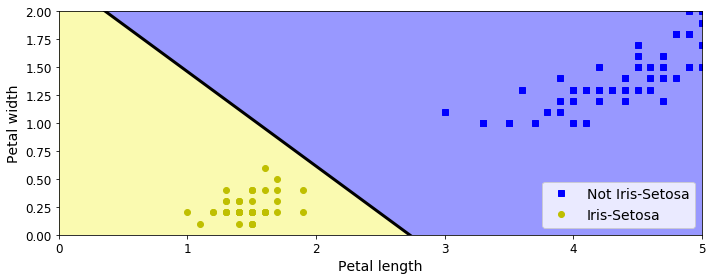

In [10]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
#clf = classifier

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [11]:
#CellStrat - Let's review the activation functions Logistic Sigmoid, ReLU, Step and tanh.

#we will also take derivative of the output of each activation function and plot it
#derivative = change in the output of activation function for a minor change in input value, divided by the quantum of change
#in the input value. i.e. (f(z2)-f(z1))/(z2-z1).

In [12]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


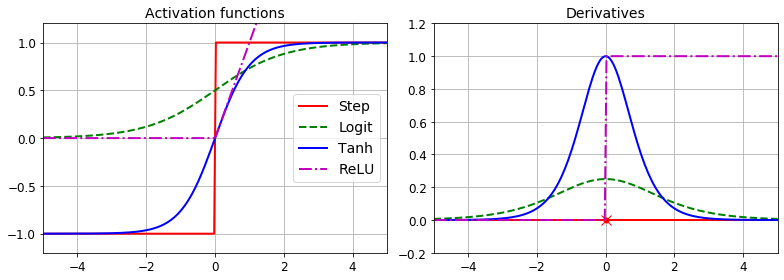

In [13]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [14]:
# Heaviside step function : https://en.wikipedia.org/wiki/Heaviside_step_function
# The Heaviside step function, or the unit step function, usually denoted by H or θ (but sometimes u, 1 or 𝟙),
# is a discontinuous function named after Oliver Heaviside (1850–1925), whose value is zero for negative argument
# and one for positive argument. It is an example of the general class of step functions, all of which can be
# represented as linear combinations of translations of this one.

#CellStrat - heaviside is a basic step function returning 0 or 1.
# mlp_xor below returns the output of a three layer MLP or multi-layer perceptron
# (Note that XOR requires three layer network, including one hidden layer. XOR cannot be implemented with just with single
# perceptron)

In [15]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

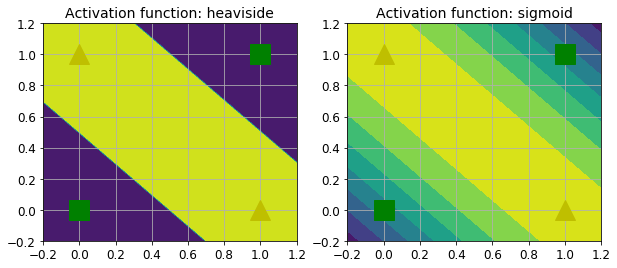

In [16]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [17]:
#CellStrat - The outputs show that heaviside step function has a clear classifier boundary for XOR data (where only 1 of the 2
# features can be positive at a time). Whereas the sigmoid has a gradual transitional boundary as it follows a continuous S-curve
# transformation.

In [18]:
#CellStrat - END OF PERCEPTRON and ACTIVATION FUNCTIONS chapter

# FNN for MNIST

## using tf.learn

In [19]:
!pip install tensorflow

You are using pip version 18.0, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

/Users/eli/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [21]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [22]:
# SKCompat : https://www.tensorflow.org/api_docs/python/tf/contrib/learn/SKCompat
# Defined in tensorflow/contrib/learn/python/learn/estimators/estimator.py.

# Scikit learn wrapper for TensorFlow Learn Estimator.

# the following code trains a DNN for classification with two hidden layers (one with 300
# neurons, and the other with 100 neurons) and a softmax output layer with 10 neurons.

# Under the hood, the DNNClassifier class creates all the neuron layers, based on the ReLU activation
# function (we can change this by setting the activation_fn hyperparameter). The output layer relies on
# the softmax function, and the cost function is cross entropy.

In [23]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1389aae10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_repl

INFO:tensorflow:loss = 0.023799289, step = 2201 (0.602 sec)
INFO:tensorflow:global_step/sec: 154.242
INFO:tensorflow:loss = 0.060603283, step = 2301 (0.649 sec)
INFO:tensorflow:global_step/sec: 174.758
INFO:tensorflow:loss = 0.049257807, step = 2401 (0.572 sec)
INFO:tensorflow:global_step/sec: 154.572
INFO:tensorflow:loss = 0.09830373, step = 2501 (0.649 sec)
INFO:tensorflow:global_step/sec: 175.936
INFO:tensorflow:loss = 0.050546527, step = 2601 (0.565 sec)
INFO:tensorflow:global_step/sec: 176.556
INFO:tensorflow:loss = 0.011786945, step = 2701 (0.566 sec)
INFO:tensorflow:global_step/sec: 179.047
INFO:tensorflow:loss = 0.059250914, step = 2801 (0.559 sec)
INFO:tensorflow:global_step/sec: 177.472
INFO:tensorflow:loss = 0.1796559, step = 2901 (0.564 sec)
INFO:tensorflow:global_step/sec: 176.602
INFO:tensorflow:loss = 0.016622571, step = 3001 (0.565 sec)
INFO:tensorflow:global_step/sec: 176.031
INFO:tensorflow:loss = 0.046298143, step = 3101 (0.568 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:global_step/sec: 169.857
INFO:tensorflow:loss = 0.0052959346, step = 10401 (0.589 sec)
INFO:tensorflow:global_step/sec: 168.436
INFO:tensorflow:loss = 0.0048766225, step = 10501 (0.593 sec)
INFO:tensorflow:global_step/sec: 173.035
INFO:tensorflow:loss = 0.010983819, step = 10601 (0.579 sec)
INFO:tensorflow:global_step/sec: 167.341
INFO:tensorflow:loss = 0.029316418, step = 10701 (0.599 sec)
INFO:tensorflow:global_step/sec: 172.551
INFO:tensorflow:loss = 0.0065928996, step = 10801 (0.577 sec)
INFO:tensorflow:global_step/sec: 171.785
INFO:tensorflow:loss = 0.0016105036, step = 10901 (0.583 sec)
INFO:tensorflow:global_step/sec: 170.242
INFO:tensorflow:loss = 0.018968455, step = 11001 (0.586 sec)
INFO:tensorflow:global_step/sec: 173.25
INFO:tensorflow:loss = 0.00335426, step = 11101 (0.578 sec)
INFO:tensorflow:global_step/sec: 171.492
INFO:tensorflow:loss = 0.0008617498, step = 11201 (0.583 sec)
INFO:tensorflow:global_step/sec: 163.657
INFO:tensorflow:loss = 0.007028841, st

INFO:tensorflow:global_step/sec: 166.778
INFO:tensorflow:loss = 0.0029111502, step = 18401 (0.603 sec)
INFO:tensorflow:global_step/sec: 163.478
INFO:tensorflow:loss = 0.007064954, step = 18501 (0.611 sec)
INFO:tensorflow:global_step/sec: 171.622
INFO:tensorflow:loss = 0.0037945977, step = 18601 (0.581 sec)
INFO:tensorflow:global_step/sec: 165.781
INFO:tensorflow:loss = 0.0016988032, step = 18701 (0.603 sec)
INFO:tensorflow:global_step/sec: 165.572
INFO:tensorflow:loss = 0.0022812092, step = 18801 (0.607 sec)
INFO:tensorflow:global_step/sec: 175.526
INFO:tensorflow:loss = 0.0026998878, step = 18901 (0.566 sec)
INFO:tensorflow:global_step/sec: 172.411
INFO:tensorflow:loss = 0.001392442, step = 19001 (0.581 sec)
INFO:tensorflow:global_step/sec: 154.93
INFO:tensorflow:loss = 0.0007308759, step = 19101 (0.644 sec)
INFO:tensorflow:global_step/sec: 179.297
INFO:tensorflow:loss = 0.001157449, step = 19201 (0.558 sec)
INFO:tensorflow:global_step/sec: 180.913
INFO:tensorflow:loss = 0.005768106, 

INFO:tensorflow:global_step/sec: 171.331
INFO:tensorflow:loss = 0.0011206265, step = 26401 (0.583 sec)
INFO:tensorflow:global_step/sec: 160.165
INFO:tensorflow:loss = 0.0009295699, step = 26501 (0.625 sec)
INFO:tensorflow:global_step/sec: 193.827
INFO:tensorflow:loss = 0.0004491024, step = 26601 (0.512 sec)
INFO:tensorflow:global_step/sec: 182.533
INFO:tensorflow:loss = 3.969239e-05, step = 26701 (0.549 sec)
INFO:tensorflow:global_step/sec: 175.239
INFO:tensorflow:loss = 0.00038575422, step = 26801 (0.572 sec)
INFO:tensorflow:global_step/sec: 169.65
INFO:tensorflow:loss = 0.0007899942, step = 26901 (0.590 sec)
INFO:tensorflow:global_step/sec: 174.806
INFO:tensorflow:loss = 0.0007483002, step = 27001 (0.570 sec)
INFO:tensorflow:global_step/sec: 174.676
INFO:tensorflow:loss = 0.00052124826, step = 27101 (0.574 sec)
INFO:tensorflow:global_step/sec: 169.095
INFO:tensorflow:loss = 0.0003748194, step = 27201 (0.591 sec)
INFO:tensorflow:global_step/sec: 165.59
INFO:tensorflow:loss = 0.0013068

INFO:tensorflow:global_step/sec: 175.118
INFO:tensorflow:loss = 0.0005166208, step = 34401 (0.572 sec)
INFO:tensorflow:global_step/sec: 199.321
INFO:tensorflow:loss = 0.0004950603, step = 34501 (0.500 sec)
INFO:tensorflow:global_step/sec: 183.542
INFO:tensorflow:loss = 0.00043777074, step = 34601 (0.547 sec)
INFO:tensorflow:global_step/sec: 178.425
INFO:tensorflow:loss = 0.001170692, step = 34701 (0.560 sec)
INFO:tensorflow:global_step/sec: 179.564
INFO:tensorflow:loss = 0.0005072032, step = 34801 (0.557 sec)
INFO:tensorflow:global_step/sec: 166.431
INFO:tensorflow:loss = 0.00065541966, step = 34901 (0.601 sec)
INFO:tensorflow:global_step/sec: 170.22
INFO:tensorflow:loss = 0.00027850096, step = 35001 (0.588 sec)
INFO:tensorflow:global_step/sec: 172.654
INFO:tensorflow:loss = 0.00068058027, step = 35101 (0.579 sec)
INFO:tensorflow:global_step/sec: 164.52
INFO:tensorflow:loss = 0.00022831745, step = 35201 (0.639 sec)
INFO:tensorflow:global_step/sec: 160.918
INFO:tensorflow:loss = 0.00015

SKCompat()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/k_/qj6ml1rd7tg6rmgg3ctm9nqc0000gq/T/tmpeg9jypzy/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9836

In [25]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07124013738807475

## Using plain TensorFlow

In [26]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [27]:
#reset_graph()

In [28]:
#reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [29]:
import numpy as np
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [30]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [31]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 40
batch_size = 50

In [36]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.94 Test accuracy: 0.9151
1 Train accuracy: 0.94 Test accuracy: 0.929
2 Train accuracy: 0.96 Test accuracy: 0.9393
3 Train accuracy: 0.94 Test accuracy: 0.9448
4 Train accuracy: 0.98 Test accuracy: 0.9488
5 Train accuracy: 0.98 Test accuracy: 0.9527
6 Train accuracy: 0.96 Test accuracy: 0.9559
7 Train accuracy: 1.0 Test accuracy: 0.9586
8 Train accuracy: 1.0 Test accuracy: 0.9613
9 Train accuracy: 0.98 Test accuracy: 0.9616
10 Train accuracy: 0.96 Test accuracy: 0.9646
11 Train accuracy: 0.98 Test accuracy: 0.9666
12 Train accuracy: 0.98 Test accuracy: 0.9665
13 Train accuracy: 1.0 Test accuracy: 0.9672
14 Train accuracy: 1.0 Test accuracy: 0.9688
15 Train accuracy: 0.94 Test accuracy: 0.97
16 Train accuracy: 0.94 Test accuracy: 0.9689
17 Train accuracy: 1.0 Test accuracy: 0.9711
18 Train accuracy: 0.98 Test accuracy: 0.9709
19 Train accuracy: 1.0 Test accuracy: 0.9712
20 Train accuracy: 1.0 Test accuracy: 0.9727
21 Train accuracy: 1.0 Test accuracy: 0.9735
22 Train 

In [37]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [38]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [39]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [40]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [41]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [42]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [43]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [44]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [45]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [46]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [47]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [48]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9039
1 Train accuracy: 0.98 Test accuracy: 0.921
2 Train accuracy: 0.98 Test accuracy: 0.93
3 Train accuracy: 0.92 Test accuracy: 0.9384
4 Train accuracy: 0.92 Test accuracy: 0.9441
5 Train accuracy: 1.0 Test accuracy: 0.9484
6 Train accuracy: 0.96 Test accuracy: 0.9501
7 Train accuracy: 0.98 Test accuracy: 0.9553
8 Train accuracy: 1.0 Test accuracy: 0.957
9 Train accuracy: 0.98 Test accuracy: 0.9602
10 Train accuracy: 0.96 Test accuracy: 0.9619
11 Train accuracy: 0.92 Test accuracy: 0.9638
12 Train accuracy: 0.98 Test accuracy: 0.966
13 Train accuracy: 1.0 Test accuracy: 0.9668
14 Train accuracy: 0.98 Test accuracy: 0.9681
15 Train accuracy: 1.0 Test accuracy: 0.9672
16 Train accuracy: 0.98 Test accuracy: 0.9686
17 Train accuracy: 0.98 Test accuracy: 0.9707
18 Train accuracy: 0.98 Test accuracy: 0.9721
19 Train accuracy: 1.0 Test accuracy: 0.9719


In [49]:
show_graph(tf.get_default_graph())